In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold



**Reading and exploring the data**

In [32]:
df = pd.read_csv('calories_burned_fitgpt_gym.csv')
print(df.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

##  **1. Attention to the attributes**

In [33]:
print(df.info(),end='\n\n')

data_types = df.dtypes
column_names = df.columns
for column in column_names:
    print(f"Column name is: {column}")
    if data_types[column] == 'object':
        print('This column contains categorical data')
        print(f"And the uniques values are:\n{df[column].unique()}\n")
    else:
        print('This column contains numerical data\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

## **2. Statistical charachteristics related to the attributes**

Satistical charachteristics of numerical attributes:

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.2

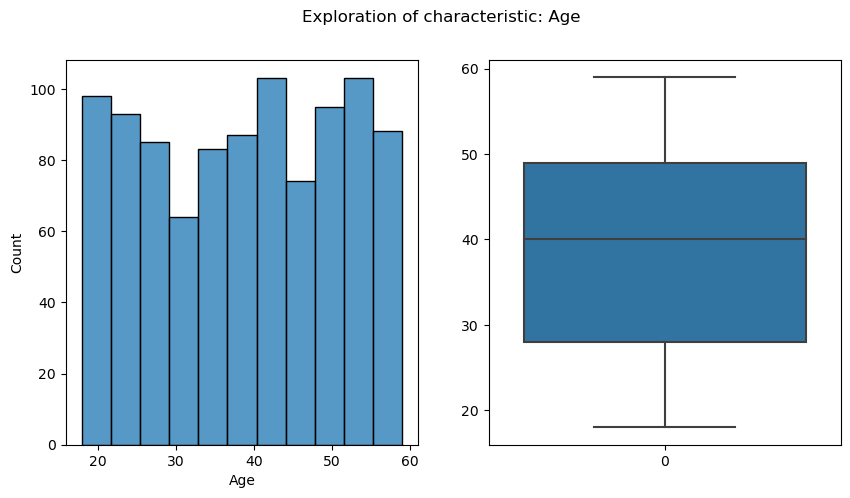

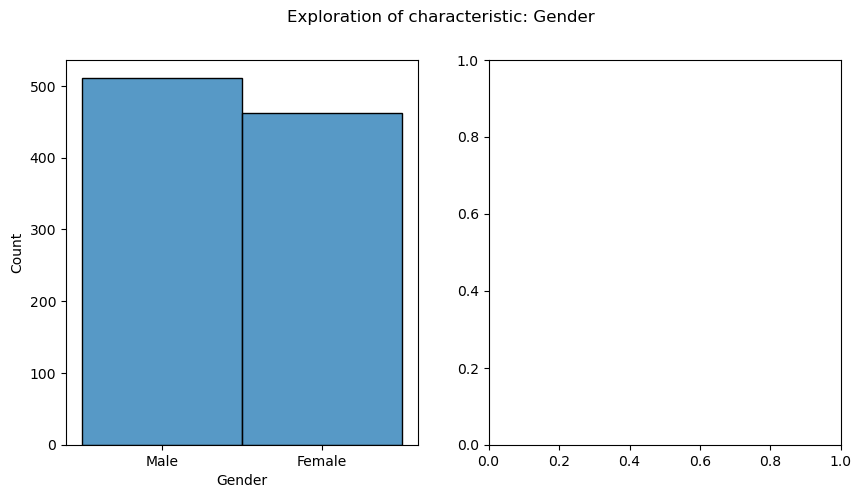

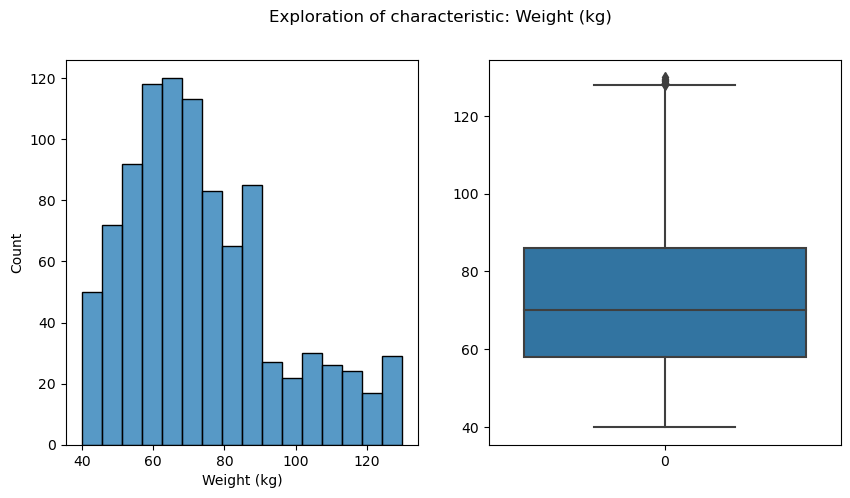

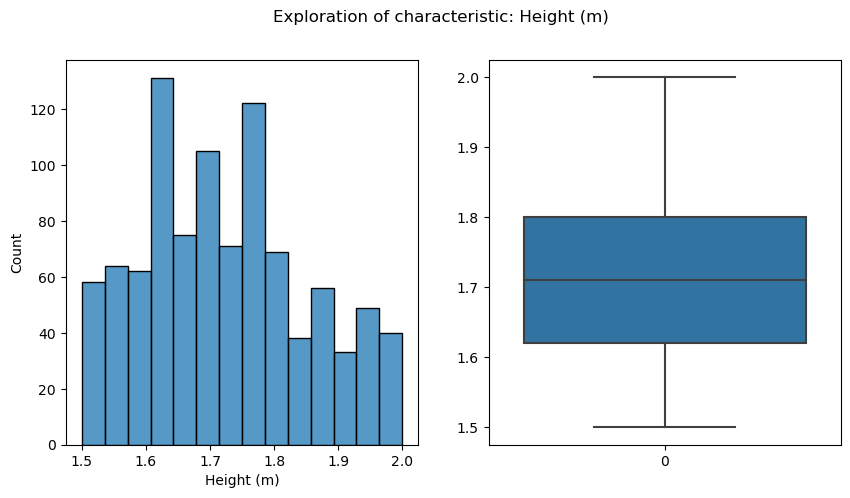

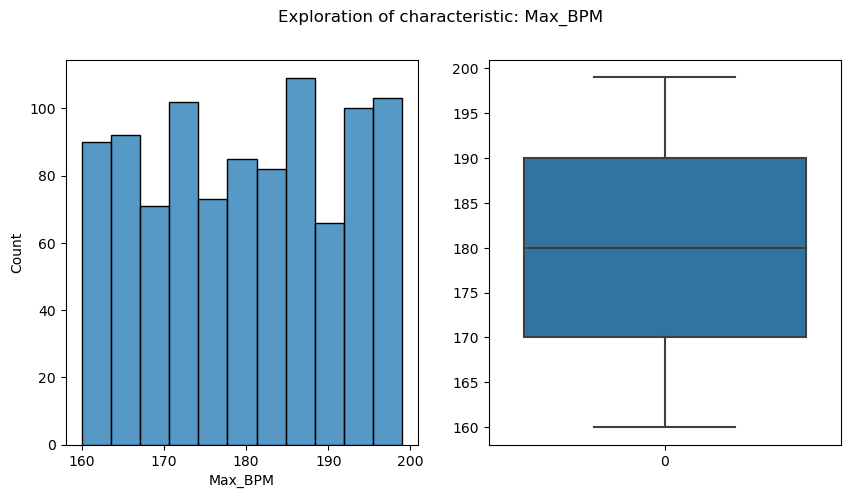

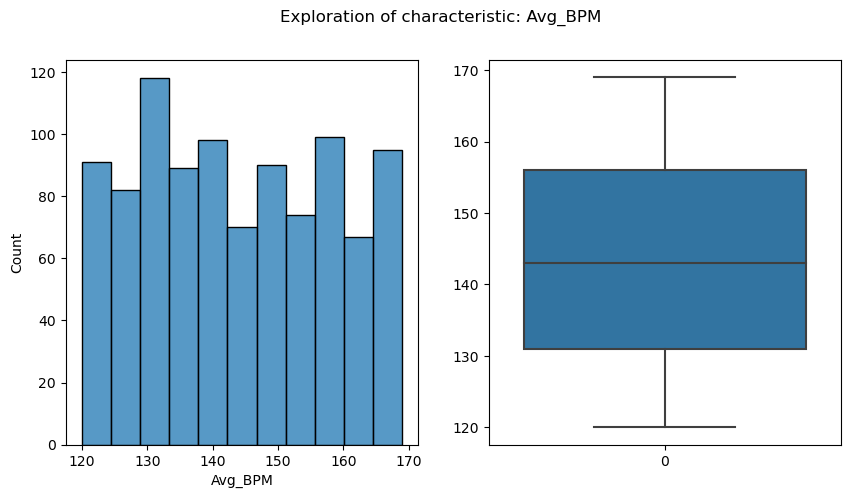

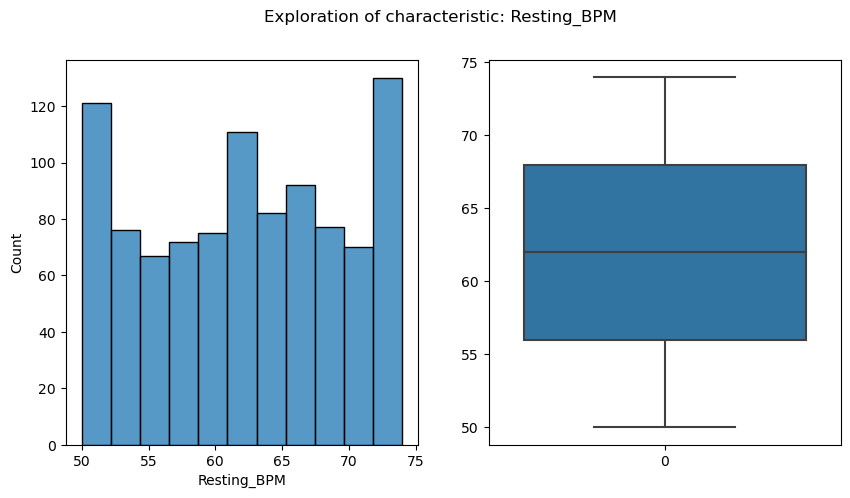

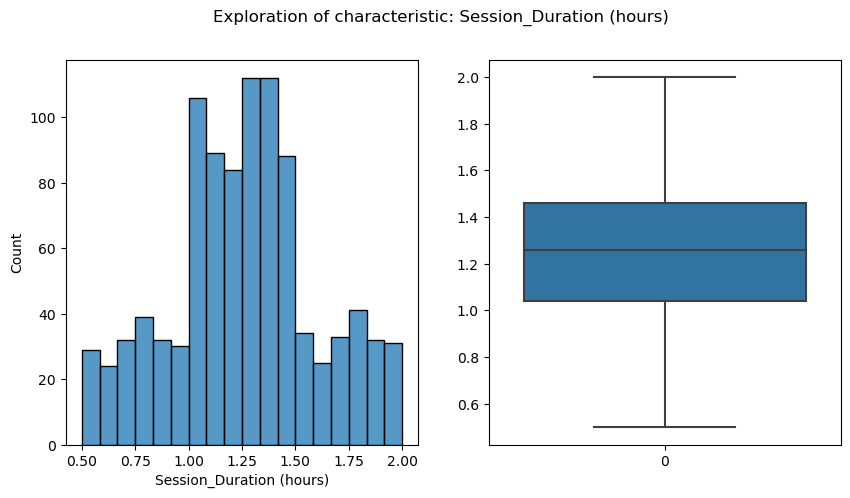

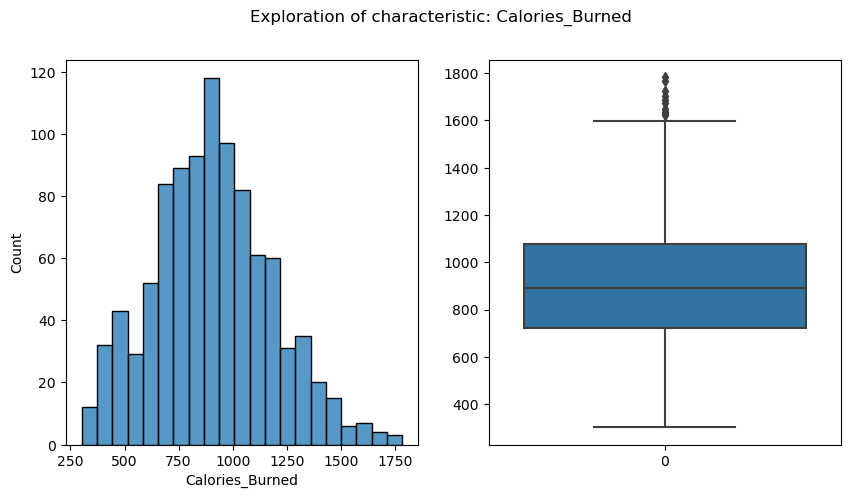

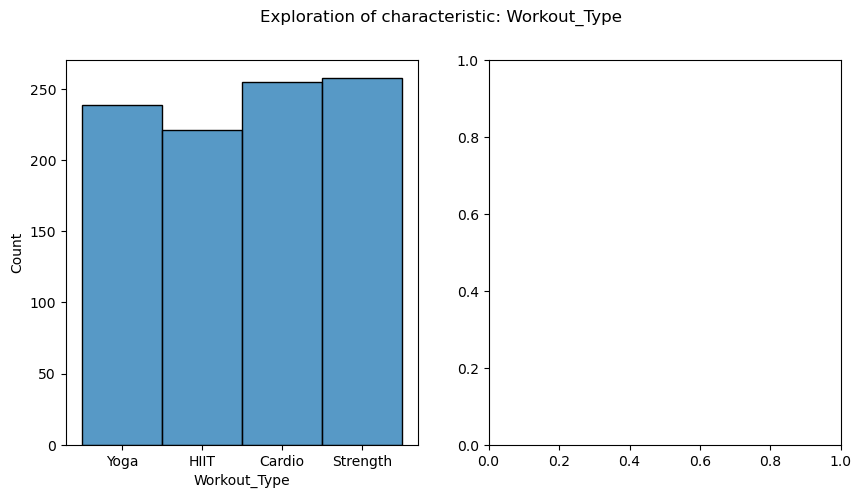

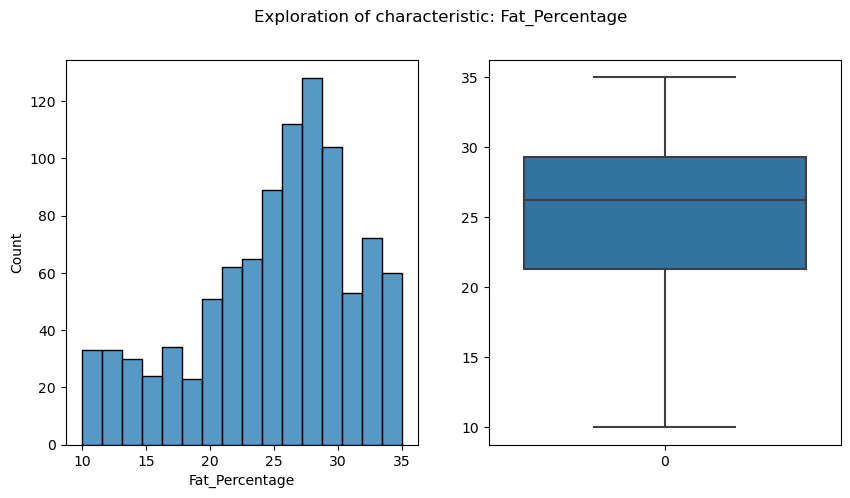

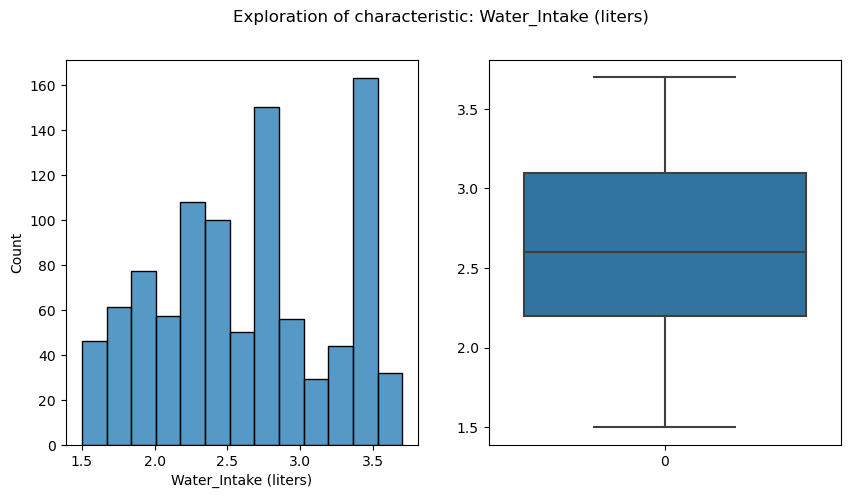

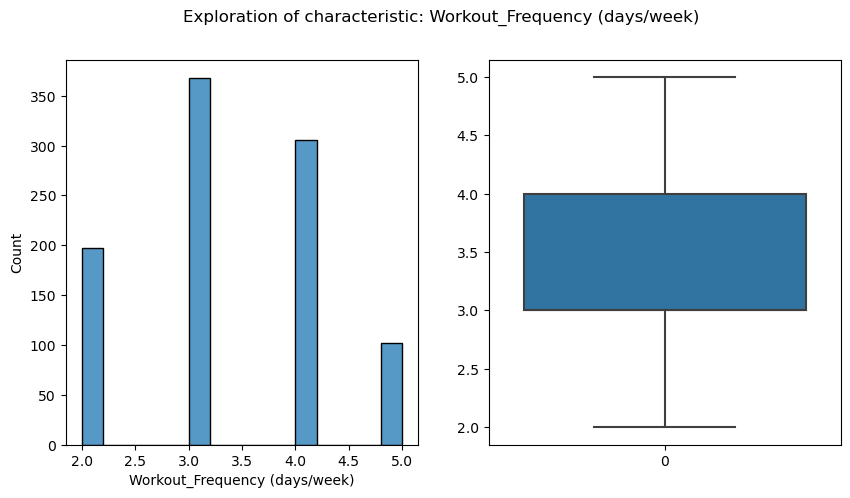

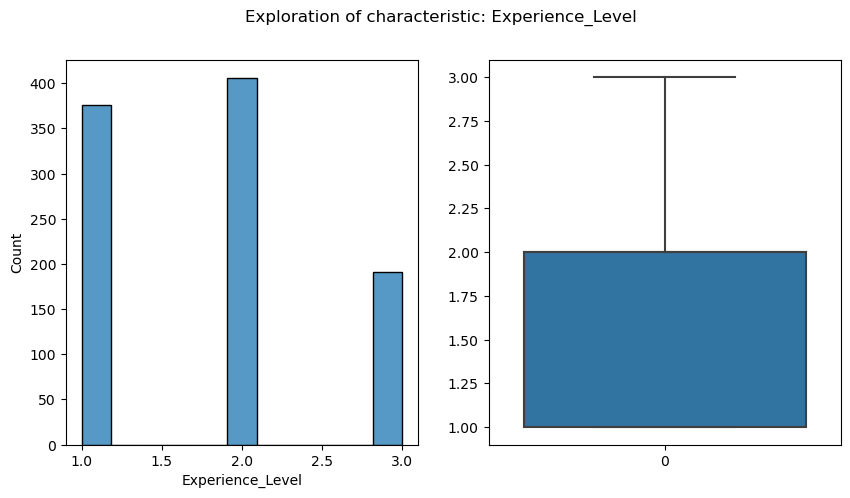

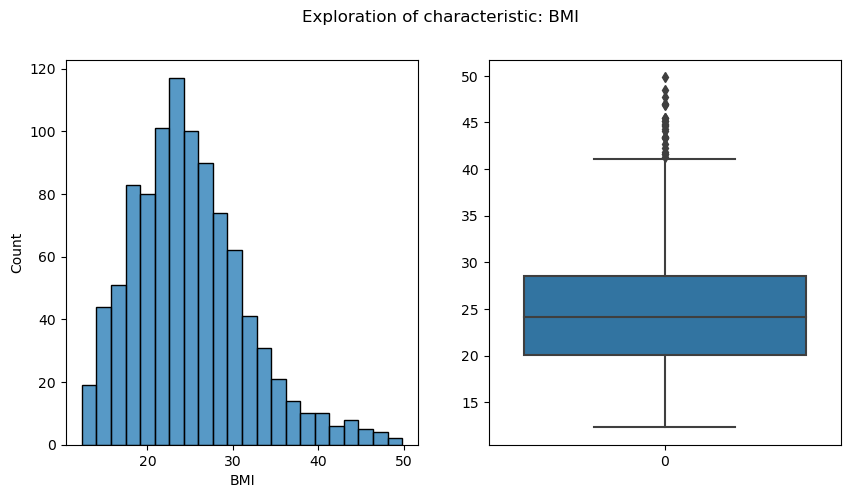

In [34]:
print("Satistical charachteristics of numerical attributes:\n")
print(df.describe())

for column in column_names:
    figure, axes = plt.subplots(1, 2, figsize=(10,5))
    figure.suptitle(f'Exploration of characteristic: {column}')
    # axes[1].xlim()
    # figure = 
    sns.histplot(data=df[column],ax = axes[0])
    if data_types[column] != 'object':
        # sns.boxplot(data=df[column])
        sns.boxplot(data=df[column],ax=axes[1])
    plt.show()

Every set of graphics shows us that how are distributed the values of a feature and are there any "anomalies"/outliers in our data

## **3. In search for missing values**

Here we can see that there is no missing values in our dataset

In [35]:
print(df.isnull().sum())
print(f'\nThere is no NA values in our dataset: {df.shape == df.dropna().shape}')

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

There is no NA values in our dataset: True


## **4. In search for outliers**

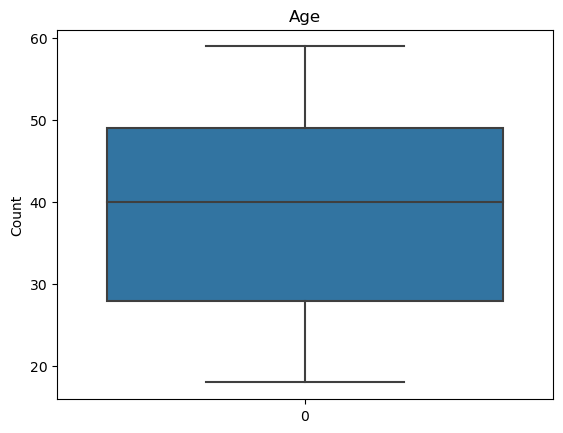

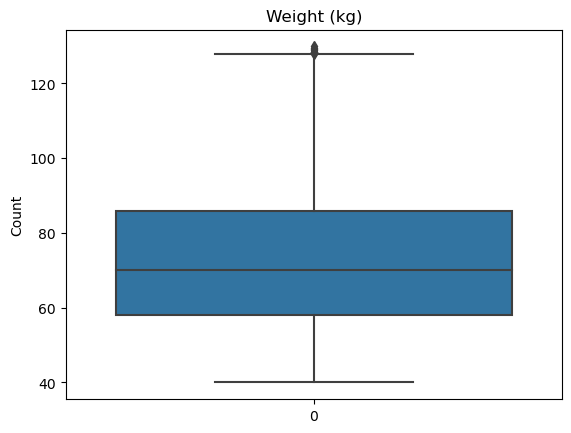

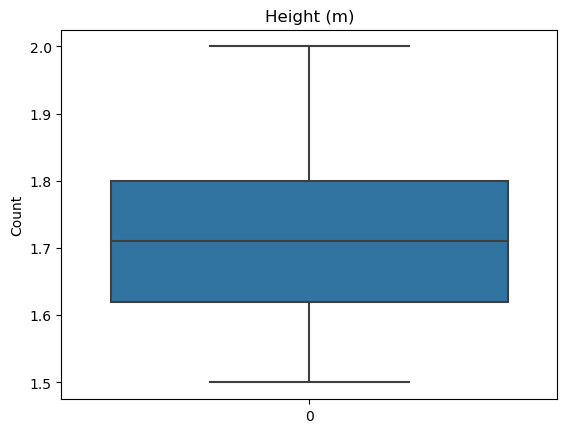

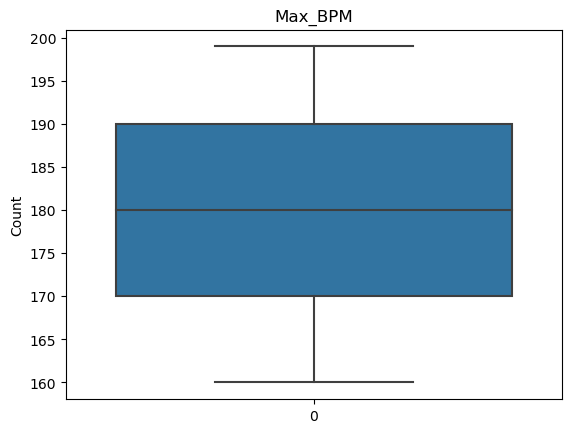

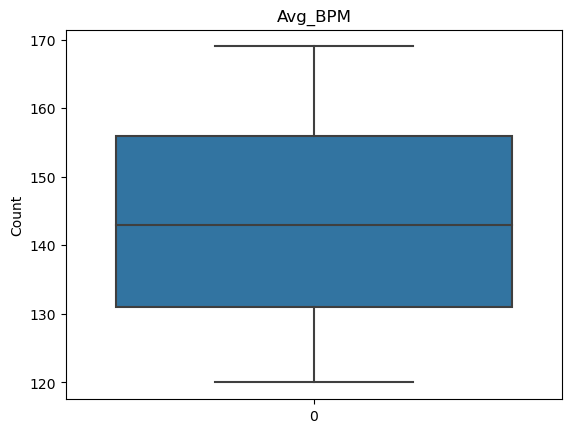

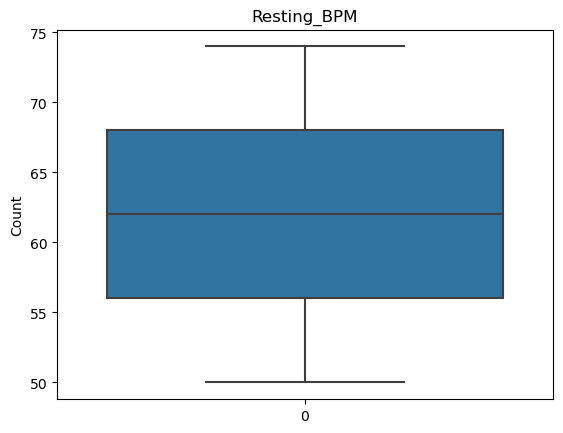

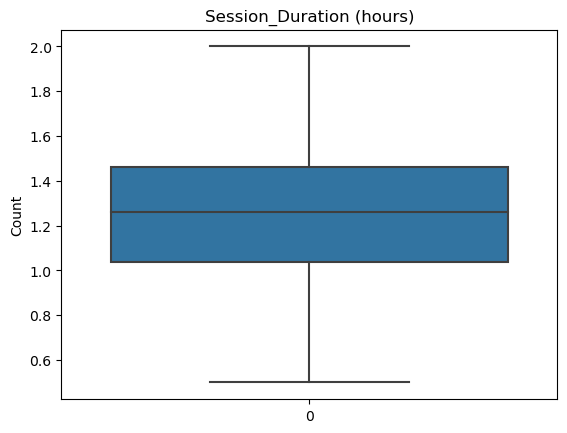

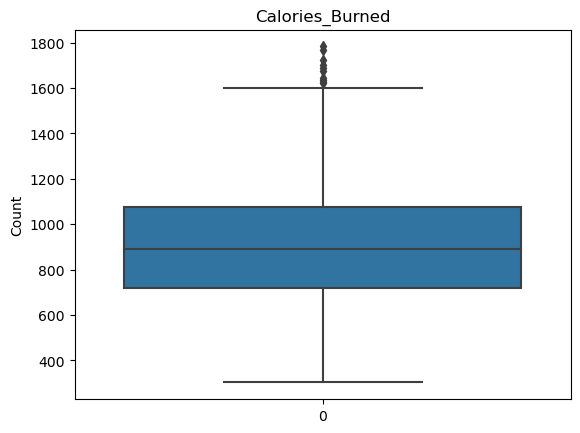

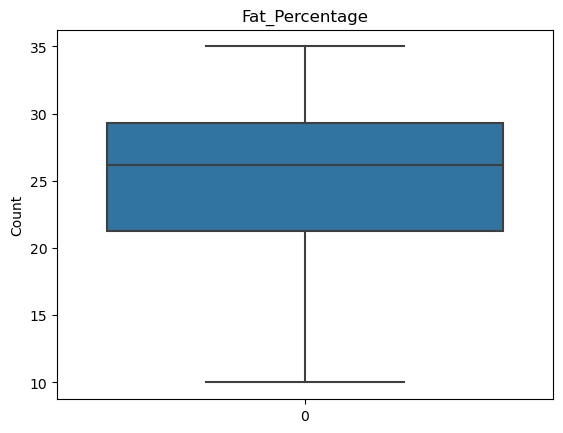

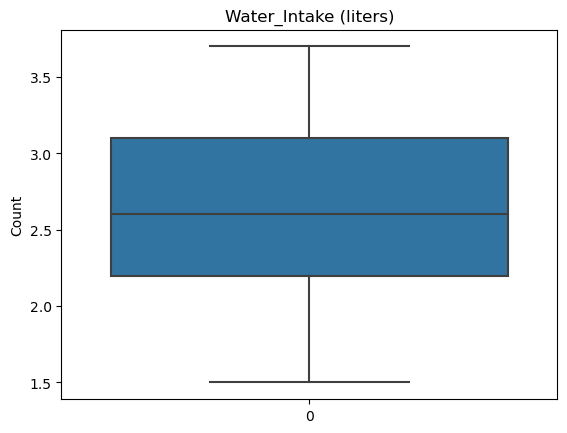

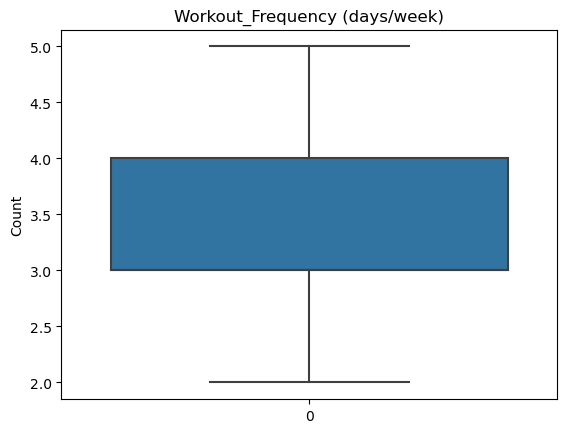

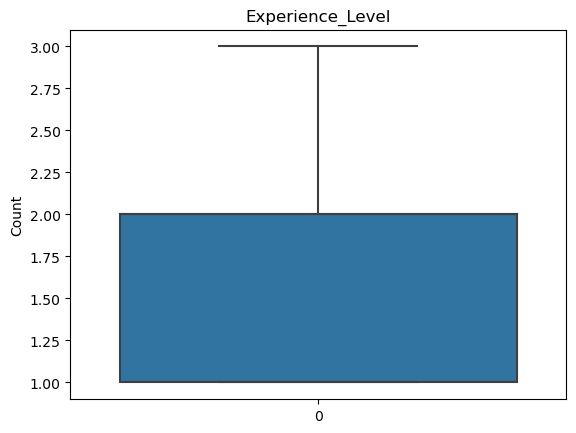

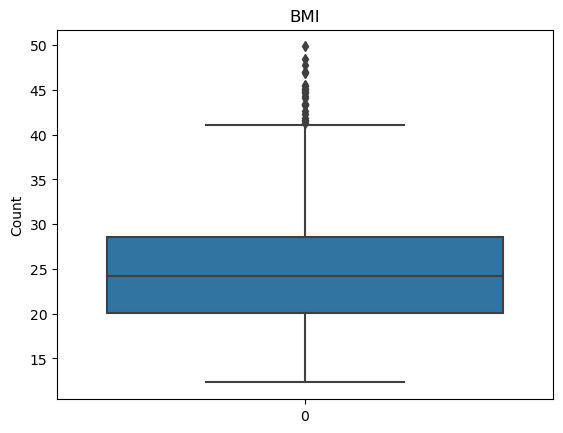

    Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
8    28   Male        121.7        1.94      185      127           52   
10   41   Male        120.8        1.67      188      146           54   
12   57   Male        112.5        1.61      195      165           61   
13   41   Male         94.5        2.00      179      136           69   
14   20   Male        117.7        1.81      196      161           54   

    Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
8                       1.03            719.0     Strength            28.9   
10                      0.82            593.0         HIIT            20.5   
12                      1.24           1013.0       Cardio            22.1   
13                      1.18            794.0         HIIT            27.6   
14                      1.35           1195.0         Yoga            26.4   

    Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
8       

In [36]:
for column in column_names:
    if data_types[column] != 'object':
        figure_outlies = sns.boxplot(data=df[column])
        figure_outlies.set_title(f'{column}')
        figure_outlies.set_ylabel('Count')
    plt.show()

# calculate z score
df_zscore = df.drop(columns=['Gender','Workout_Type']).apply(zscore)

vector_with_indicies = df[(df_zscore > 2)].dropna(how='all').index

print(df.iloc[vector_with_indicies].head())

From the boxplot above we can see that there are almost no outliers. And ones which are present are possible and logical and there is no need to replace or remove them. As well as we can see printed "outliers" does not strike as something unusual for a human.

## **4. Feature selection**

**Analysing correlations**

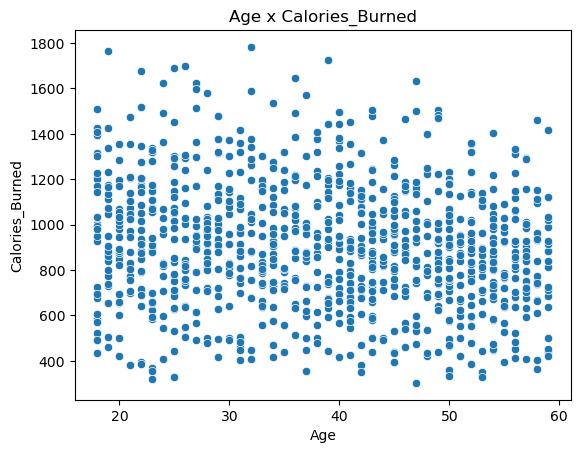

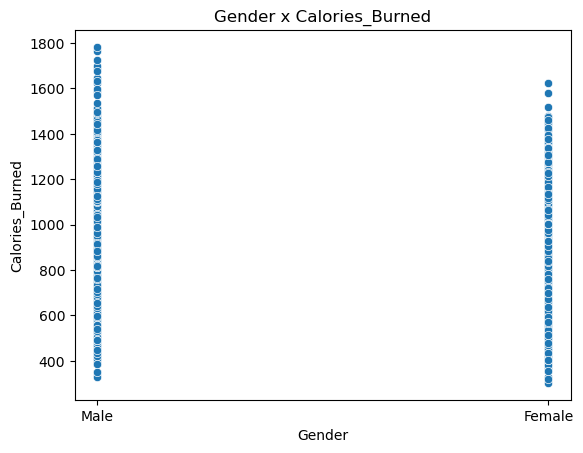

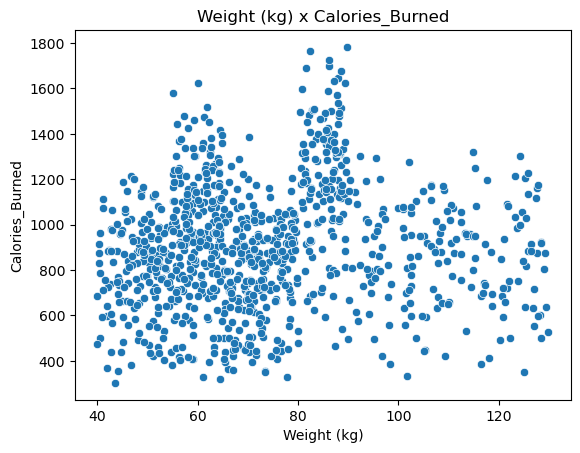

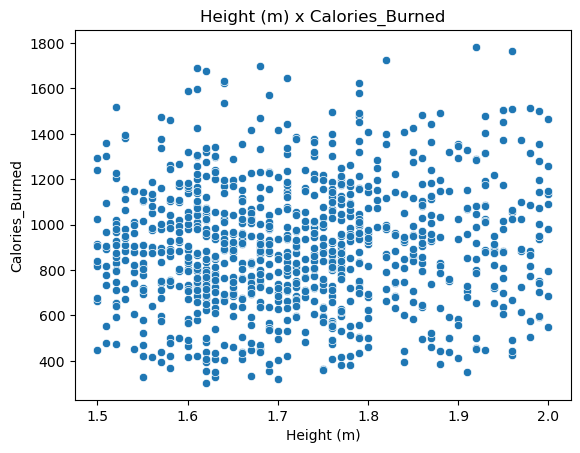

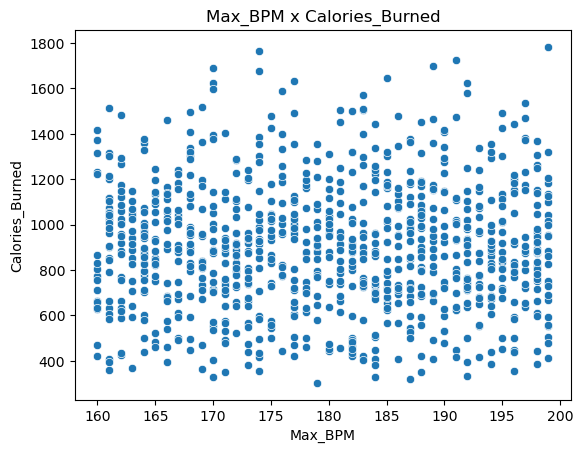

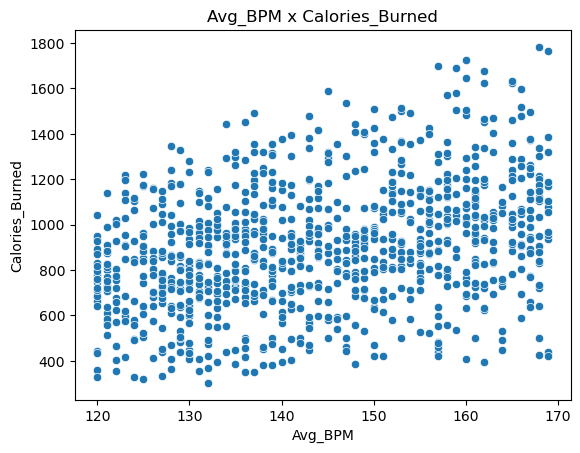

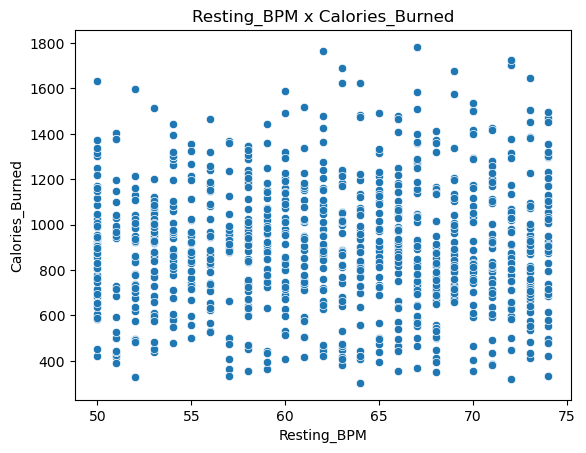

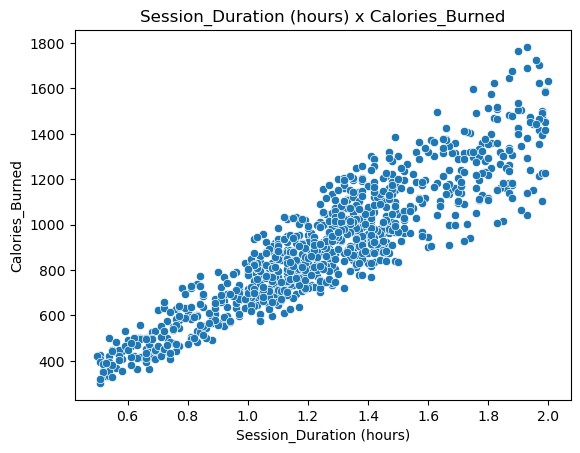

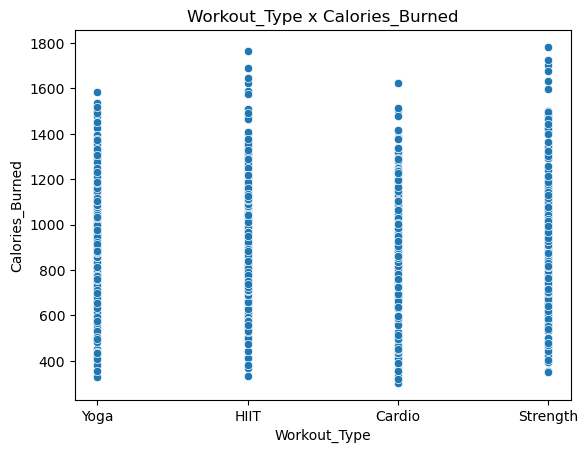

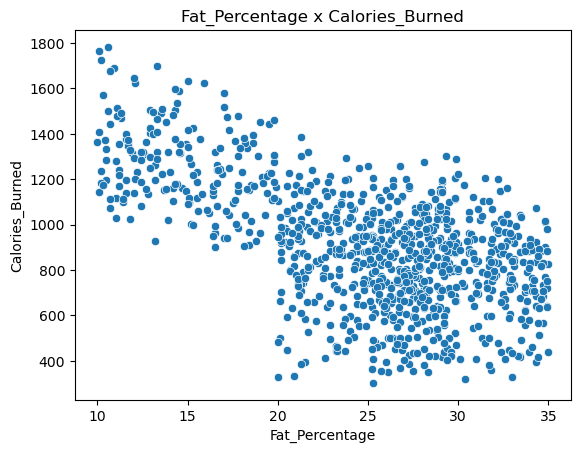

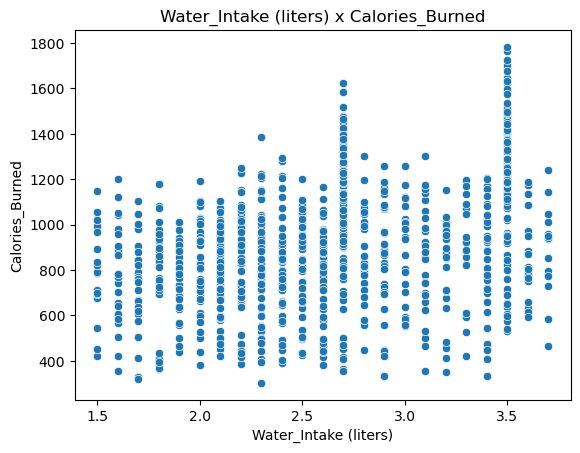

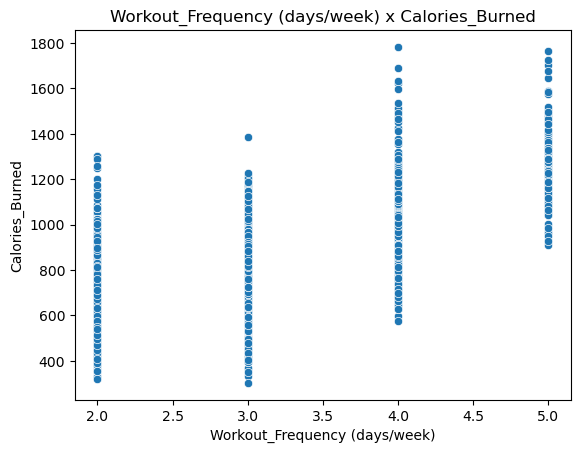

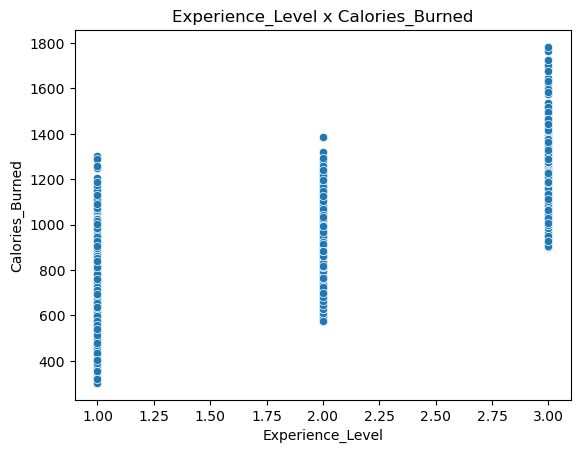

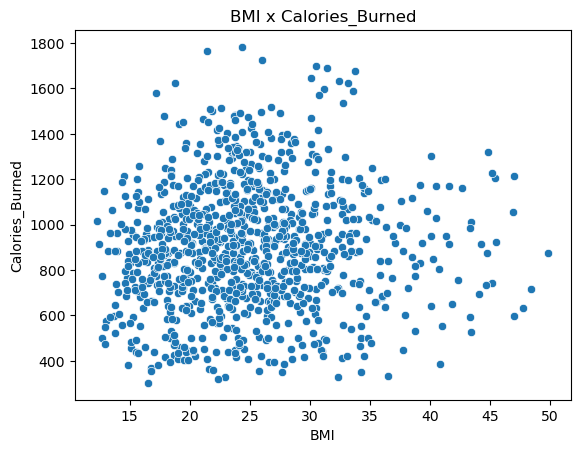

In [37]:
TARGET_NAME = 'Calories_Burned'
for column in column_names:
    if column == TARGET_NAME:
        continue
    figure_outlies = sns.scatterplot(x=df[column],y=df[TARGET_NAME])
    figure_outlies.set_title(f'{column} x {TARGET_NAME}')
    figure_outlies.set_ylabel(TARGET_NAME)
    figure_outlies.set_xlabel(column)
    plt.show()

As what we can see from the scatterplots, Session_duration (Hours) has a strong correlation with Calories_Burned, Avg_BPM shows a slight corellation with Calories_Burned as well as Fat_Percentage has a light negative correlation with Calories_Burned

**Let's encode Gender and Workout_Type**

In [38]:
df_one_hot_encoded = pd.get_dummies(df, columns=['Gender', 'Workout_Type'], drop_first=True)
df_one_hot_encoded


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,1,0,0,1
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,0,1,0,0
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,0,0,0,0
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,1,0,1,0
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77,1,0,1,0
969,25,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69,1,0,1,0
970,59,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50,0,0,0,0
971,32,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74,1,1,0,0


Now let's try correlation matrix

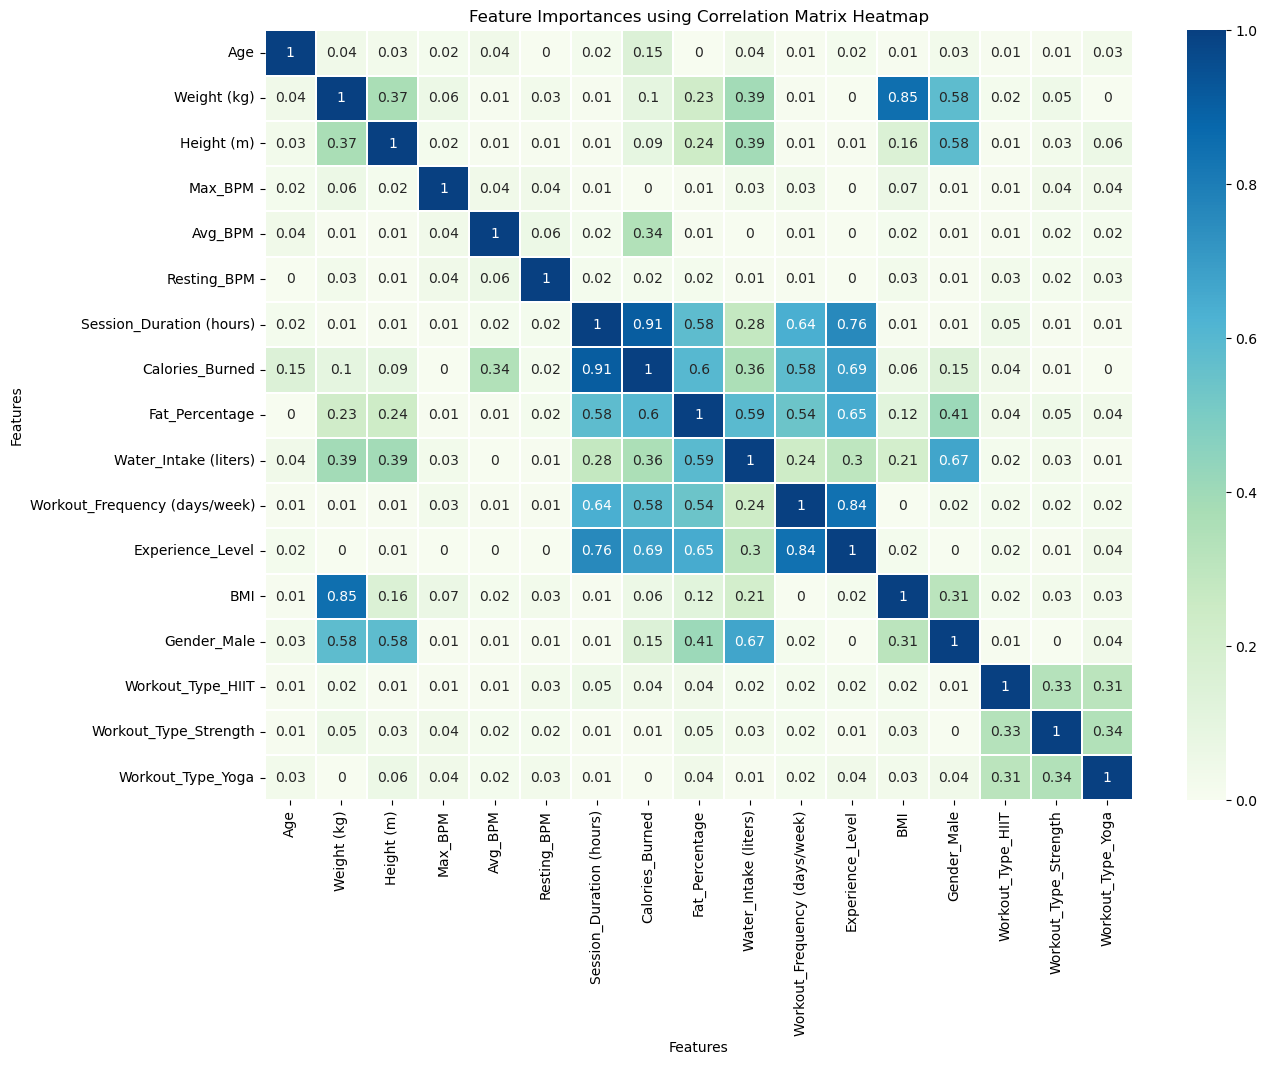

In [39]:
corr_matrix = df_one_hot_encoded.corr().abs().round(2)
plt.figure(figsize=(14, 10))
figure = sns.heatmap(corr_matrix, annot=True, cmap='GnBu', linewidths=0.2, vmin=0, vmax=1)
figure.set_xlabel('Features')
figure.set_ylabel('Features')
figure.set_title('Feature Importances using Correlation Matrix Heatmap')
plt.show()

In this big heatmap we can observe correlations between all of our features and exctract features for example which are important to our target variable, but i will make a better representation in the next cell. As well as taking abs() of values is used to show just "importnace"/percentage wise correlation of features and it ignores direction of it.

**I will separate target variable form the data**

In [40]:
target = df_one_hot_encoded['Calories_Burned']
df_one_hot_encoded_no_target = df_one_hot_encoded.drop(columns=['Calories_Burned'])

And now let's sum up the correlation observations from scatterplot and heatmap to see how are the thigs with our target variable

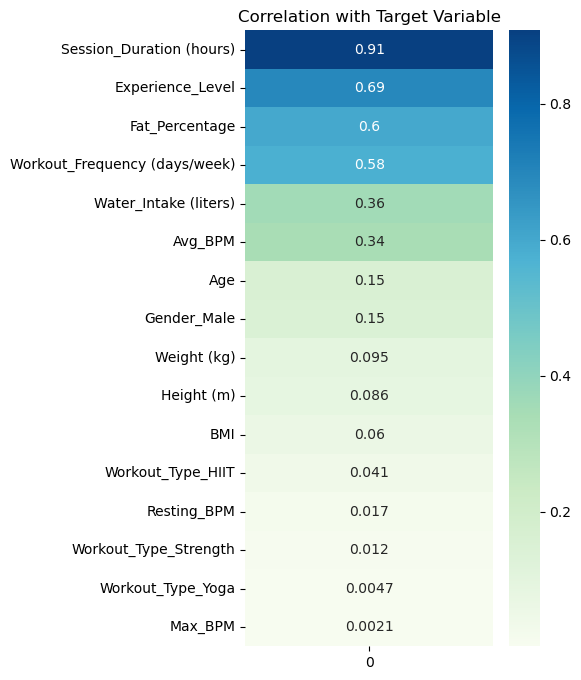

In [41]:
target_correlations = df_one_hot_encoded_no_target.corrwith(target).abs()
target_correlations = target_correlations.sort_values(ascending=False)

plt.figure(figsize=(4, 8))
sns.heatmap(target_correlations.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

From this pretty heatmap we can see that best features to use for our model are (the threshold is >=0.15): 

- Session_Duration (hours)

- Experience_Level

- Fat_Percentage

- Workout_Frequency (days/week)

- Water_Intake (liters)

- Avg_BPM

- Age

- Gender_Male

Let's verify our choice with LASSO model

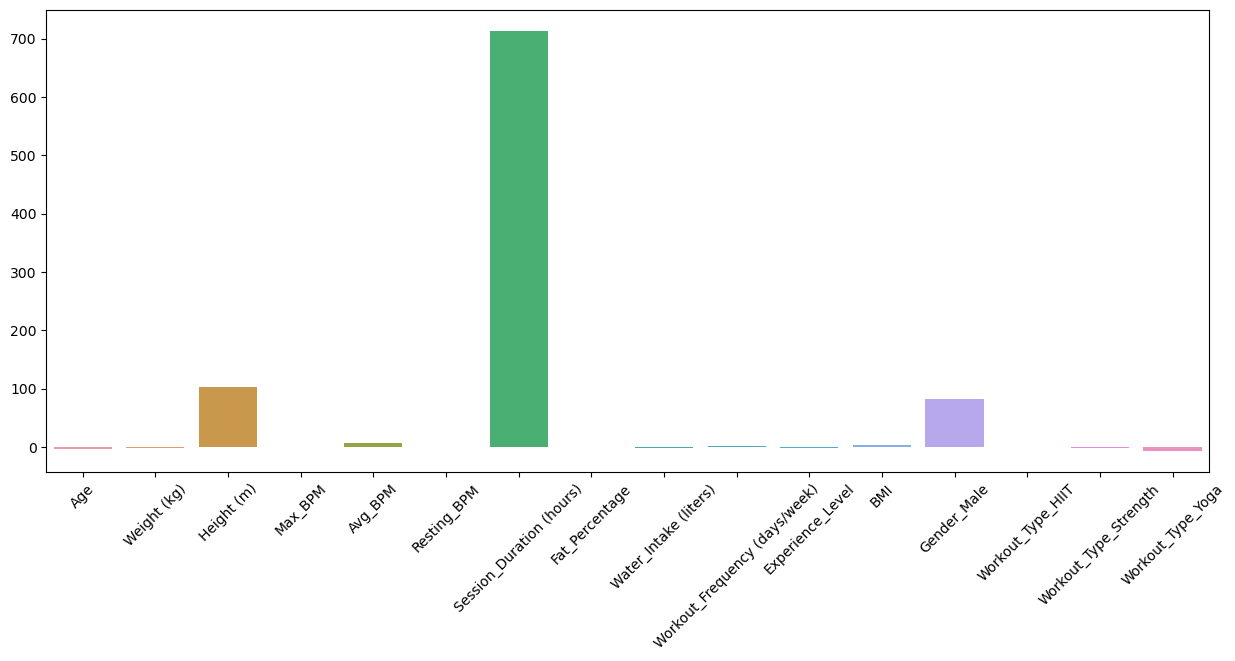

Here goes the row coeficents as well: [-3.42015264e+00 -9.97504479e-01  1.02236624e+02  4.15794077e-02
  6.23886497e+00  3.87619680e-01  7.13661945e+02 -4.40844529e-01
 -1.37227372e+00  1.70018896e+00 -2.27508251e+00  3.36187908e+00
  8.30058216e+01 -7.69835144e-01 -1.76206831e+00 -6.65142451e+00]


In [42]:

lasso = Lasso(alpha=0.01)
lasso_coef = lasso.fit(df_one_hot_encoded_no_target, target).coef_
plt.figure(figsize=(15, 6))
figure = sns.barplot(x=df_one_hot_encoded_no_target.columns, y=lasso_coef)
figure.set_xlabel('')
plt.xticks(rotation=45)
plt.show()
print(f"Here goes the row coeficents as well: {lasso_coef}")

As we can see in the graphic, Lasso showed us a different picture of feature importance and 2 new features poped up: 

- Height (m)

- Workout_Type_Yoga

**Let's check out the change in features if we change our target variable to needed binary version of it**

In [48]:
new_target = target.copy()
for i in range(len(target)):
    if target.iloc[i] >= 800:
        new_target.iloc[i] = 1
    else:
        new_target.iloc[i] = 0
new_target

0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
968    1.0
969    1.0
970    1.0
971    1.0
972    0.0
Name: Calories_Burned, Length: 973, dtype: float64

In [53]:
new_target.value_counts()

1.0    630
0.0    343
Name: Calories_Burned, dtype: int64

With this very important check we can see that our target variable is imbalanced!

Let's check the correlation first

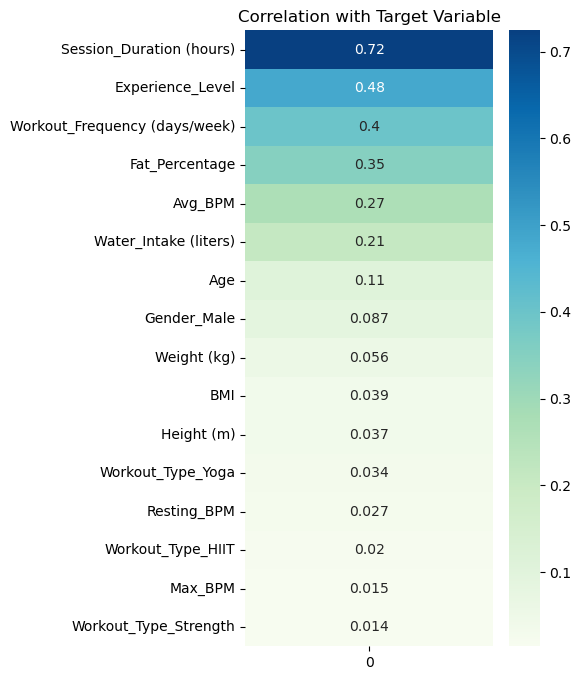

In [54]:
target_correlations = df_one_hot_encoded_no_target.corrwith(new_target).abs()
target_correlations = target_correlations.sort_values(ascending=False)

plt.figure(figsize=(4, 8))
sns.heatmap(target_correlations.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

As we can see there almost no difference between base and modified Calories_Burned target variable. In modified version correlation generaly dropped a little.

Now let's check LASSO

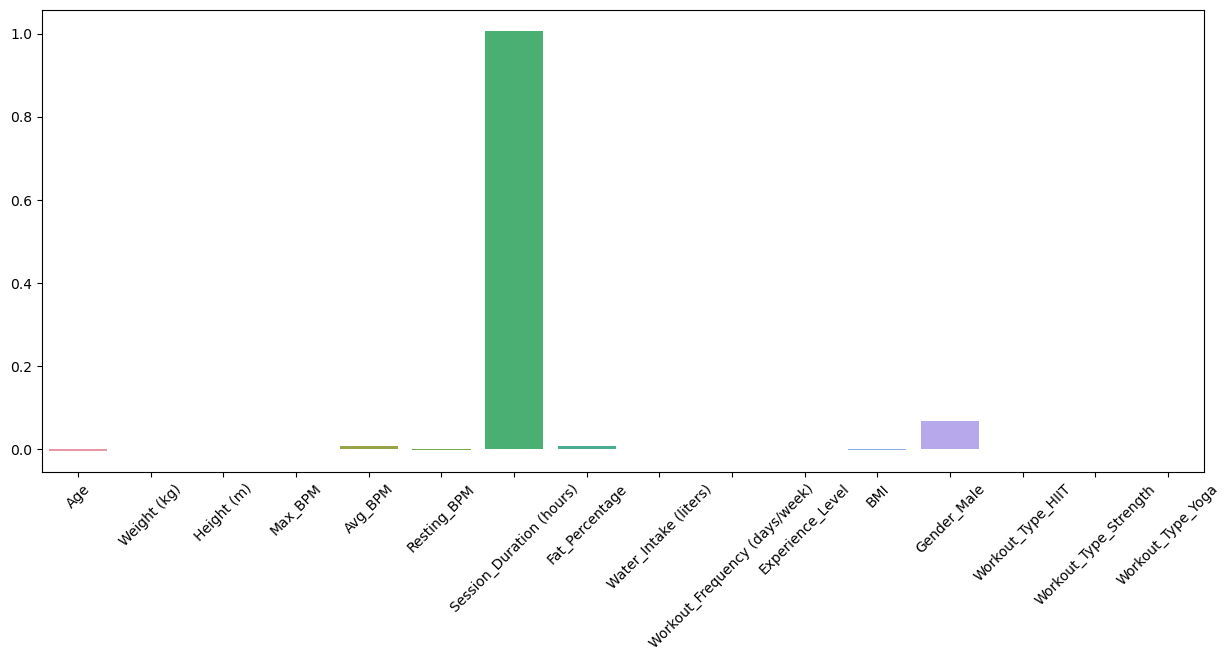

Here goes the row coeficents as well: [-3.97251612e-03  1.30278250e-03  0.00000000e+00 -5.24580243e-04
  8.65685478e-03 -1.61551046e-03  1.00691939e+00  8.41186269e-03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -1.31744075e-03
  6.83830119e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [58]:
lasso = Lasso(alpha=0.01)
lasso_coef = lasso.fit(df_one_hot_encoded_no_target, new_target).coef_
plt.figure(figsize=(15, 6))
figure = sns.barplot(x=df_one_hot_encoded_no_target.columns, y=lasso_coef)
figure.set_xlabel('')
plt.xticks(rotation=45)
plt.show()
print(f"Here goes the row coeficents as well: {lasso_coef}")

We can see that in our modified target Height disappeared from the feature of high importance but BMI showed up so we are on the same alley

And here is our selection of features:

- Session_Duration (hours)

- Experience_Level

- Fat_Percentage

- Workout_Frequency (days/week)

- Water_Intake (liters)

- Avg_BPM

- Age

- Gender_Male

- Height (m)

- Workout_Type_Yoga

In [60]:
X = df_one_hot_encoded_no_target[['Session_Duration (hours)','Experience_Level','Fat_Percentage','Workout_Frequency (days/week)','Water_Intake (liters)','Avg_BPM','Age','Gender_Male','Height (m)','Workout_Type_Yoga']]
y = new_target

To sum up this analysis I can say that there is a lot of other options to search for features through data such as in inforamtion gain, feature selection with Random Forest, Chi-test and etc. But i decided that tests that i performed would be enough for now.

## **5 Model experiments**

Importing some needed libraries

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


Spliting the dataset

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## KNN

training

In [ ]:
knn = KNeighborsClassifier()

steps = [('scaler', StandardScaler()),
         ('knn', knn)]
pipeline = Pipeline(steps)

k_range = list(range(1, 51))
param_grid = dict(knn__n_neighbors=k_range)

grid_search = GridSearchCV(pipeline, param_grid=param_grid)
grid_search.fit(X_train, y_train)



evaluating

In [89]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print('\n')

y_pred = grid_search.best_estimator_.predict(X_test)

accuracy = accuracy_score(y_true=y_test,y_pred=y_pred)
report = classification_report(y_true=y_test,y_pred=y_pred)

print(f'Accuracy: {accuracy}')
print('Classification report:\n',report)

cfm = confusion_matrix(y_true=y_test,y_pred=y_pred,labels=[1,0])
cfm

0.8898561614426793
{'knn__n_neighbors': 44}


Accuracy: 0.8835616438356164
Classification report:
               precision    recall  f1-score   support

         0.0       0.88      0.78      0.82       103
         1.0       0.89      0.94      0.91       189

    accuracy                           0.88       292
   macro avg       0.88      0.86      0.87       292
weighted avg       0.88      0.88      0.88       292



array([[178,  11],
       [ 23,  80]], dtype=int64)

In [ ]:
#TODO: Explain your findings, fix confusion matrix and explore other models